# ------------------ CFGDEGREE - AUTUMN 2022 ------------------

The project was worked on by Ingrid Ionita,  Hiu Ching (Clarissa) Lo, Michelle Obonyano and Ayomide Olarewaju.

# PART 2: DATA ANALYSIS

## 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce
import math
from sklearn.cluster import KMeans

import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.point import Point
from geopy.extra.rate_limiter import RateLimiter

Once we have imported all of our necessary libraries, we will also bring in the cleaned data file.

In [2]:
DF = pd.read_csv('road_accident_data_cleaned.csv')
DF

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_3171/1396347788.py:1: DtypeWarning: Columns (0,1,30) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('road_accident_data_cleaned.csv')


accident_index accident_reference_x  location_easting_osgr  \
0      2021010287149             10287149               535379.0   
1      2021010287149             10287149               535379.0   
2      2021010287149             10287149               535379.0   
3      2021010287149             10287149               535379.0   
4      2021010287149             10287149               535379.0   
...              ...                  ...                    ...   
64688  202163DF01721            63DF01721               320842.0   
64689  202163DF01721            63DF01721               320842.0   
64690  202163DF01721            63DF01721               320842.0   
64691  202163DF02122            63DF02122               307792.0   
64692  202163DF02122            63DF02122               307792.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    180783.0  -0.050574  51.509767             1   
1                    180783.0  -0.050574  51.509767             1   
2                    180783.0  -0.050574  51.509767             1   
3                    180783.0  -0.050574  51.509767             1   
4                    180783.0  -0.050574  51.509767             1   
...                       ...        ...        ...           ...   
64688                311766.0  -3.172778  52.697776            63   
64689                311766.0  -3.172778  52.697776            63   
64690                311766.0  -3.172778  52.697776            63   
64691                308034.0  -3.364790  52.662169            63   
64692                308034.0  -3.364790  52.662169            63   

       accident_severity  number_of_vehicles  number_of_casualties  ...  \
0                      2                   2                     3  ...   
1                      2                   2                     3  ...   
2                      2                   2                     3  ...   
3                      2                   2                     3  ...   
4                      2                   2                     3  ...   
...                  ...                 ...                   ...  ...   
64688                  1                   3                     3  ...   
64689                  1                   3                     3  ...   
64690                  1                   3                     3  ...   
64691                  1                   2                     2  ...   
64692                  1                   2                     2  ...   

      vehicle_type  junction_location journey_purpose_of_driver sex_of_driver  \
0                9                  8                         6             1   
1                9                  1                         6             1   
2                9                  8                         6             1   
3                9                  1                         6             1   
4                9                  8                         6             1   
...            ...                ...                       ...           ...   
64688           21                  0                         1             1   
64689            9                  0                         6             1   
64690           21                  0                         1             1   
64691            9                  0                         2             1   
64692            9                  0                         2             1   

       age_of_driver  age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                 32                   6     Large Engine cc                2   
1                 21                   5    Medium Engine cc                1   
2                 32                   6     Large Engine cc                2   
3                 21                   5    Medium Engine cc                1   
4                 32                   6     Large Engine cc                2   


Then, we will examine it using .describe() and .info().

In [3]:
DF.describe()

location_easting_osgr  location_northing_osgr     longitude  \
count           64693.000000            64693.000000  64693.000000   
mean           458707.200176           287062.184409     -1.141609   
std             77637.395519           114901.405389      1.130666   
min            175320.000000            70163.000000     -5.265939   
25%            404355.000000           183804.000000     -1.938009   
50%            448326.000000           276448.000000     -1.269303   
75%            527207.000000           372764.000000     -0.161044   
max            655140.000000           654664.000000      1.755781   

           latitude  police_force  accident_severity  number_of_vehicles  \
count  64693.000000  64693.000000       64693.000000        64693.000000   
mean      52.472859     21.228093           2.745150            2.248976   
std        1.036121     18.447549           0.483789            0.902146   
min       50.530387      1.000000           1.000000            1.000000   
25%       51.539668      1.000000           3.000000            2.000000   
50%       52.378473     17.000000           3.000000            2.000000   
75%       53.247003     34.000000           3.000000            2.000000   
max       55.785269     63.000000           3.000000           11.000000   

       number_of_casualties   day_of_week  first_road_class  ...  \
count          64693.000000  64693.000000      64693.000000  ...   
mean               1.903065      4.158502          3.192370  ...   
std                1.290390      1.972351          0.794202  ...   
min                1.000000      1.000000          1.000000  ...   
25%                1.000000      2.000000          3.000000  ...   
50%                1.000000      4.000000          3.000000  ...   
75%                2.000000      6.000000          3.000000  ...   
max               10.000000      7.000000          5.000000  ...   

       casualty_severity  vehicle_reference_y  vehicle_type  \
count       64693.000000         64693.000000  64693.000000   
mean            2.817090             1.583046      9.422009   
std             0.419834             0.771917      3.994106   
min             1.000000             1.000000      2.000000   
25%             3.000000             1.000000      9.000000   
50%             3.000000             1.000000      9.000000   
75%             3.000000             2.000000      9.000000   
max             3.000000            11.000000     97.000000   

       junction_location  journey_purpose_of_driver  sex_of_driver  \
count       64693.000000               64693.000000   64693.000000   
mean            2.515033                   4.556289       1.299399   
std             3.198605                   1.989338       0.457998   
min             0.000000                   1.000000       1.000000   
25%             0.000000                   2.000000       1.000000   
50%             1.000000                   6.000000       1.000000   
75%             5.000000                   6.000000       2.000000   
max             9.000000                   6.000000       2.000000   

       age_of_driver  age_band_of_driver  propulsion_code  age_of_vehicle  
count   64693.000000        64693.000000      64693.00000    64693.000000  
mean       40.668929            6.939808          1.76254        8.148687  
std        16.169127            1.727241          1.47692        5.546221  
min        11.000000            3.000000          1.00000       -1.000000  
25%        28.000000            6.000000          1.00000        4.000000  
50%        38.000000            7.000000          1.00000        7.000000  
75%        52.000000            8.000000          2.00000       12.000000  
max       101.000000           11.000000         12.00000       89.000000  

[8 rows x 33 columns]

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64693 entries, 0 to 64692
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               64693 non-null  object 
 1   accident_reference_x                         64693 non-null  object 
 2   location_easting_osgr                        64693 non-null  float64
 3   location_northing_osgr                       64693 non-null  float64
 4   longitude                                    64693 non-null  float64
 5   latitude                                     64693 non-null  float64
 6   police_force                                 64693 non-null  int64  
 7   accident_severity                            64693 non-null  int64  
 8   number_of_vehicles                           64693 non-null  int64  
 9   number_of_casualties                         64693 non-null  int64  
 10

## 2: FINDING CORRELATIONS

We created a new variable to use for our correlation analysis, because we need to drop a few irrelevant columns for this analysis.

In [5]:
DF_CORR = DF.drop(columns=['casualty_reference', 'vehicle_reference_y', 'vehicle_reference_x', 'age_band_of_driver', 'age_band_of_casualty', 'latitude', 'longitude', 'location_easting_osgr', 'location_northing_osgr'])

Once we have the columns that we need, we plotted a heatmap using seaborn to see what variables correlate to each other. The accident severity is a variable we are interested in, and it looks like casualty severity is strongly correlated to it. Otherwise, there does not seem to be a big correlation between the other variables, which means they do not depend on each other.

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_3171/1696507471.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = DF_CORR.corr().round(2)


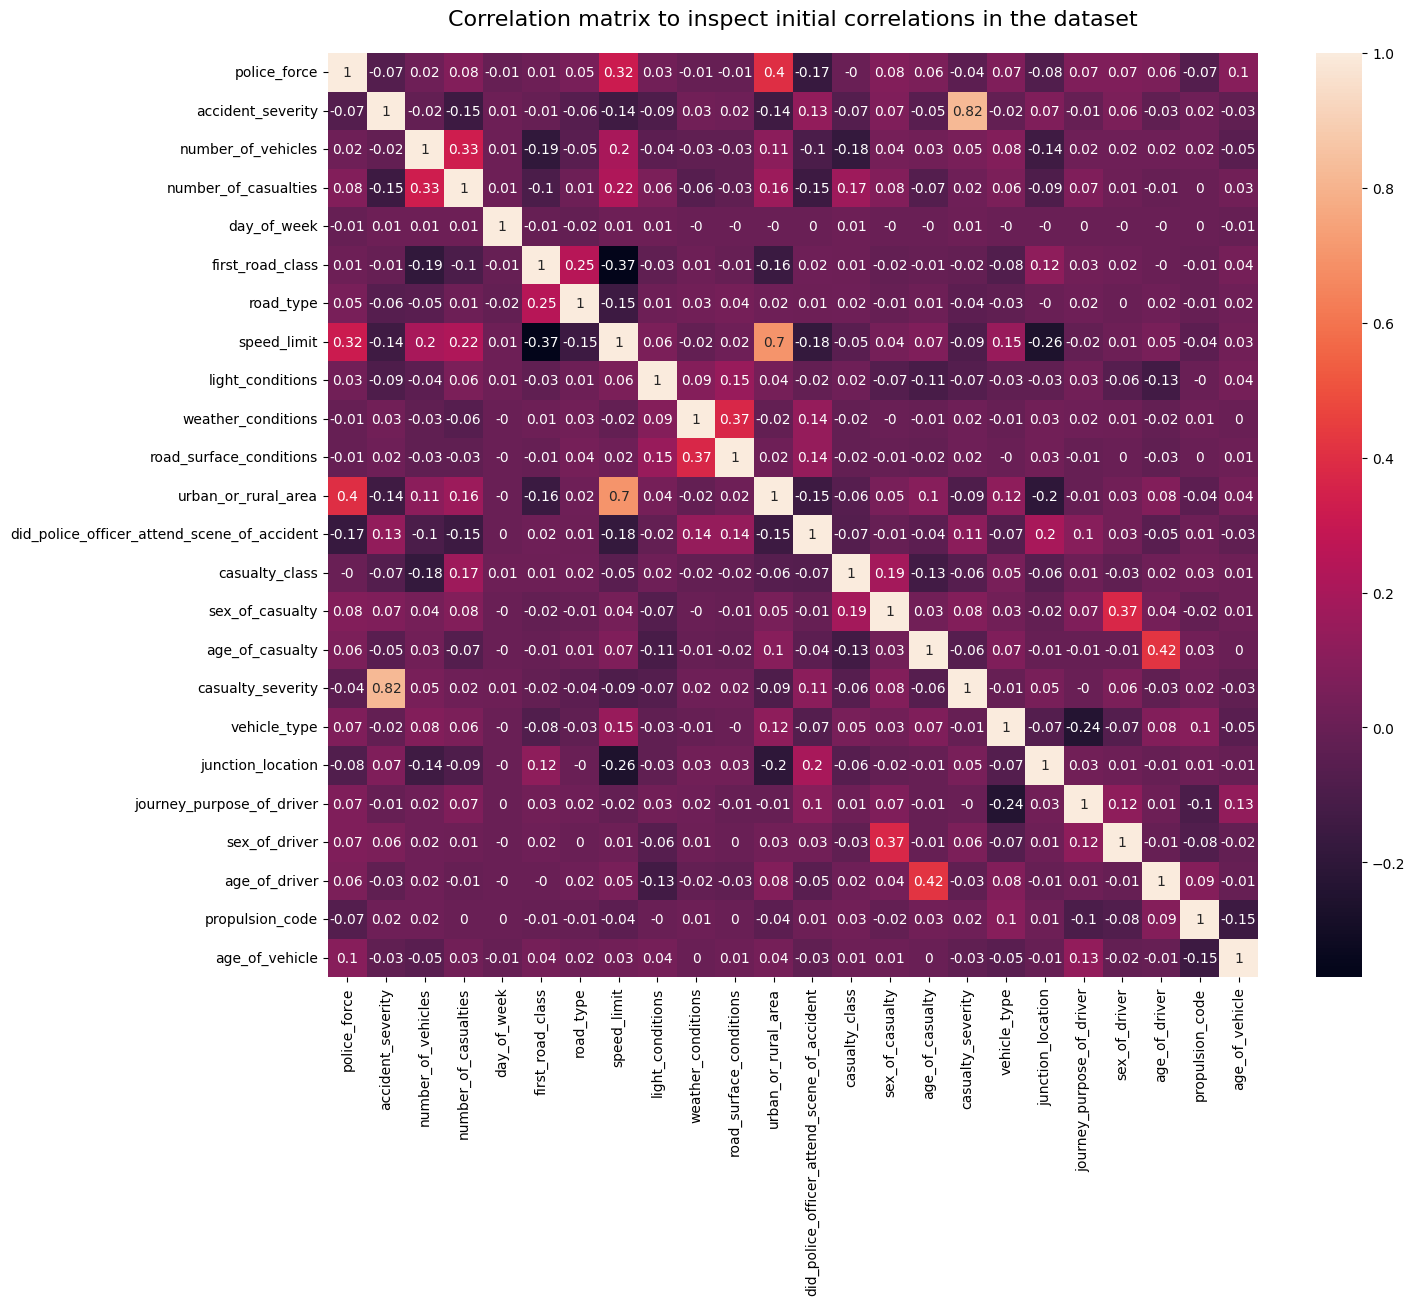

In [6]:
## seaborn correlation heatmap ##
# figure
plt.figure(figsize = (15, 12))

# correlation matrix calculations
correlation_matrix = DF_CORR.corr().round(2)

# heatmap
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size":10})

#title of heatmap
plt.title("Correlation matrix to inspect initial correlations in the dataset", fontsize = 16, pad=20)
plt.show()

We plotted a second, more simplistic heatmap.

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_3171/600310035.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF_CORR.corr())


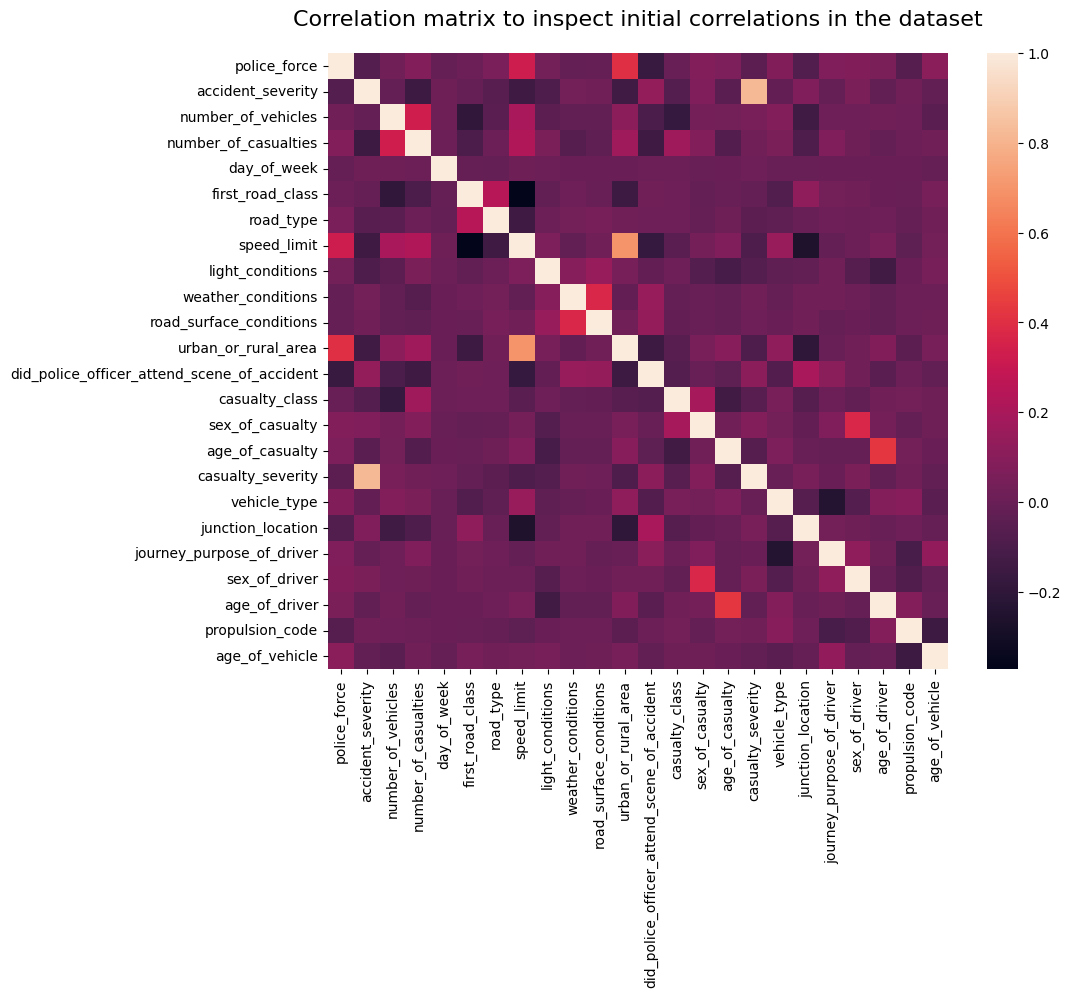

In [7]:
## simplistic correlation heatmap ##
# figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(DF_CORR.corr())

# title
plt.title("Correlation matrix to inspect initial correlations in the dataset", fontsize = 16, pad=20)
plt.show()

## 3: ANALYSIS

In this section we will analyse the data that we cleaned and we will investigate what variables are more likely to lead to a traffic accident. 

### QUESTION 1: Are certain drivers more likely to get involved in a car accident compared to others?

The accident severity is the variable we are most interested in, as it denotes what the accident resulted in: fatality, serious injuries or slight injuries. We will use this variable for the most part of our analysis, because we want to see what factors go into making an accident results in a death, serious injury or slight injury. We will also compare it with external factors such as light and weather conditions to find out the factors that increase the likelihood of a traffic accident to happen.

#### What is the total count of traffic accidents by the accident severity?

In [8]:
## count of accident number by accident severity ##
accident_severity_counts = DF.accident_severity.value_counts()
accident_severity_counts

3    49634
2    13631
1     1428
Name: accident_severity, dtype: int64

Plotting the total count into a pie chart to better visualise the difference. 76.8% of traffic accidents in 2021 were slight, with nearly a quarter being serious. A very small percentage of traffic accidents result in death.

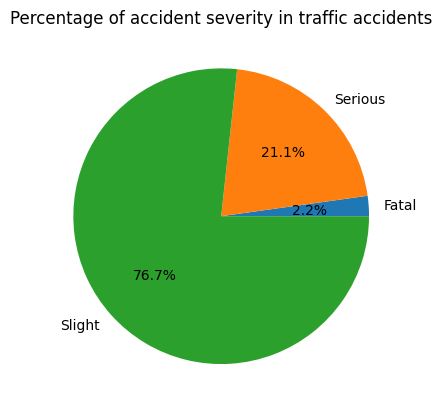

In [9]:
## plot of accident number by accident severity ##

# slices / ratio
slices = [accident_severity_counts[1],accident_severity_counts[2],accident_severity_counts[3]]

# labels
severity = ["Fatal", "Serious", "Slight"]

# pie
plt.pie(slices, labels = severity,autopct='%1.1f%%')

# other elements of the pie
plt.title('Percentage of accident severity in traffic accidents')
plt.show()

#### What are the total accidents for each age band of the driver?

We first counted the number of accidents per age band of driver. To do so, we ran a value count for the age_band_of_driver column.

In [10]:
## count of accidents by the age band of the driver ##
age_band_of_driver_count = DF.age_band_of_driver.value_counts().sort_index()
age_band_of_driver_count

3        28
4      4630
5      8156
6     16398
7     12655
8     10377
9      7009
10     3337
11     2103
Name: age_band_of_driver, dtype: int64

We then plotted the data into a bar chart. Plotting the findings into a bar chart to better understand the difference in the total of traffic accidents that drivers and casualties may get involved in.

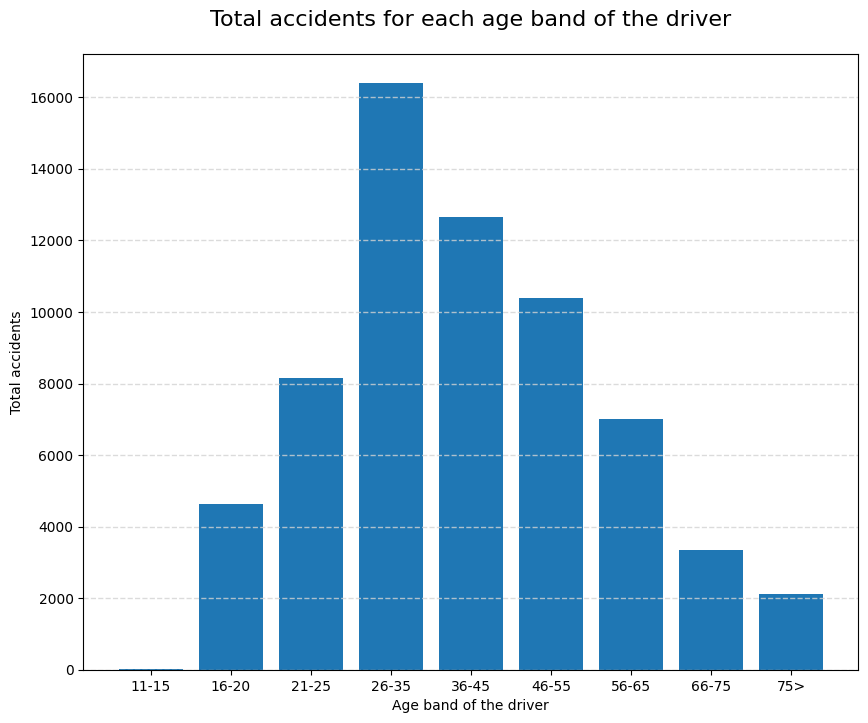

In [11]:
## plot of age band of driver ##

# figure
plt.figure(figsize=(10,8))

# drivers' age bar
age_band_driver = ["11-15", "16-20", "21-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75>"]
plt.bar(age_band_driver, age_band_of_driver_count)

# x-axis
plt.xlabel('Age band of the driver')
plt.xticks(age_band_driver)

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents for each age band of the driver', pad=20, fontsize=16)
plt.grid(color='lightgrey', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.show()

#### What are the total casualties for each age band of the casualties?

We are also interested in the age distribution of casualties. Therefore, we counted the number of casualties by the casualty age. The results shows that people aged 26-35, followed by those aged 36-45, are the most likely to be injured in traffic accidents. These results are also visualised in a bar chart.

In [12]:
## count of the age band of the casualties ##
age_band_of_casualty_count = DF.age_band_of_casualty.value_counts().sort_index()
age_band_of_casualty_count

1       894
2      1180
3      1765
4      6130
5      8325
6     15057
7     10671
8      9112
9      6278
10     3049
11     2232
Name: age_band_of_casualty, dtype: int64

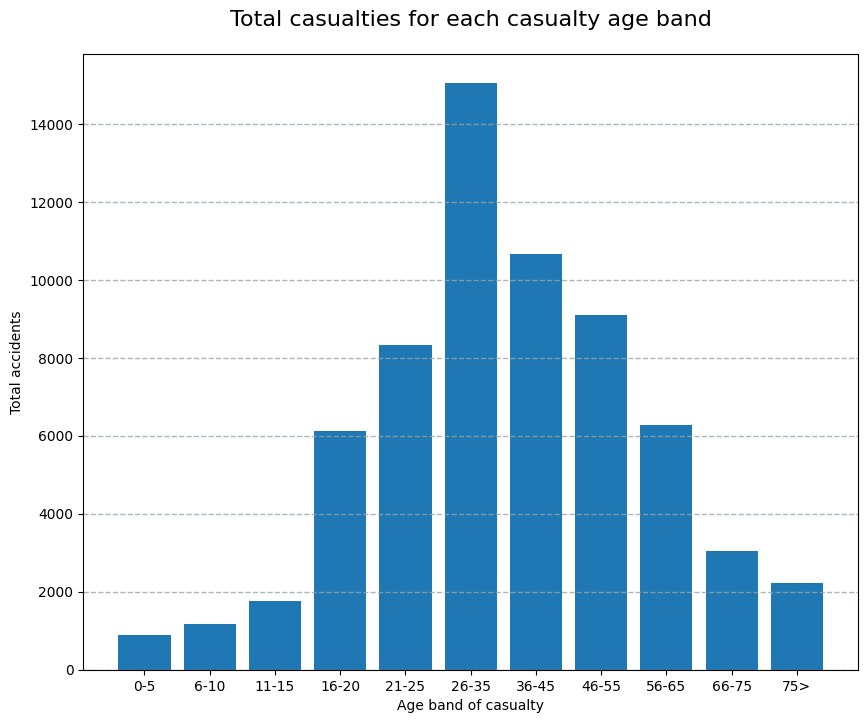

In [13]:
## age band of casualty bar chart ##
# figure
plt.figure(figsize=(10,8))

# bar
age_band_casualty = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75>"]
plt.bar(age_band_casualty, age_band_of_casualty_count)

# x-axis
plt.xlabel('Age band of casualty')
plt.xticks(age_band_casualty)

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total casualties for each casualty age band', pad=20, fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.show()

#### What are the total accidents by the gender of the driver?

We are looking at the gender difference of drivers in traffic accidents, which shows that men are twice as likely to be involved in a collision.

In [14]:
## count of drivers involved by gender ##
sex_of_driver_count = DF.sex_of_driver.value_counts()
sex_of_driver_count

1    45324
2    19369
Name: sex_of_driver, dtype: int64

#### What are the total casualties by gender casualty?
Males are more likely to be injured in traffic accidents. Yet, compared to the drivers' gender difference in accidents, the casualty difference of gender is not as drastic.

In [15]:
# count of casualties by gender ##
sex_of_casualty_count = DF.sex_of_casualty.value_counts()
sex_of_casualty_count

1    39522
2    25171
Name: sex_of_casualty, dtype: int64

We then plotted the gender distribution of accidents and casulties in a bar chart. There were significantly more males than female drivers and casualties involved in accidents. Interestingly, there were more male drivers than male casualties involved. However, for females, a different pattern is shown (i.e., less female drivers than female casualties).

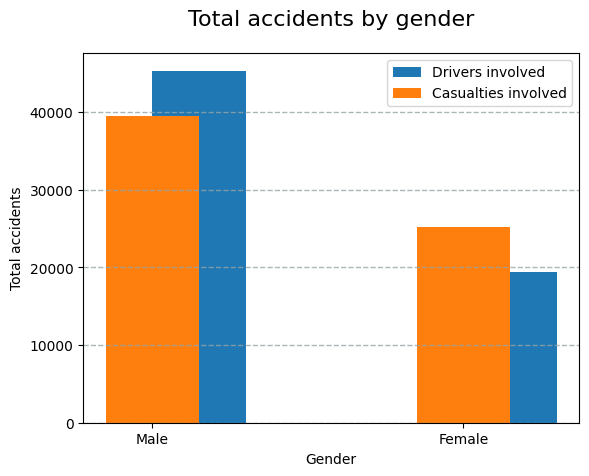

In [16]:
## visualising accidents by driver and casualty gender ##

# driver bar
plt.bar(["Male","Female"], sex_of_driver_count, align='edge', width=0.3)

# casualty bar
plt.bar(["Male","Female"], sex_of_casualty_count,  width=0.3)

# x-axis
plt.xlabel('Gender')

#y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by gender', pad=20, fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.legend(["Drivers involved","Casualties involved"])

plt.show()

#### What are the total accidents by the age and gender of the driver?
We wanted to see whether male and female drivers would show different age distributions in total accidents. Therefore, we made a pivot table counting the total accidents according to the age of driver as index and sex of driver as columns. The data is plotted with a line graph.

In [17]:
## new data frame with information regarding the sex and age of drivers and casualties ##
GEN_AGE_AF = DF[['sex_of_driver','sex_of_casualty','age_of_driver', 'age_band_of_driver','age_of_casualty','age_band_of_casualty','casualty_severity']]

In [18]:
## pivot table counting the total accidents with the age of driver as index and sex of driver as columns ##
PIVOT_TBL_1a = GEN_AGE_AF.pivot_table(
   index = 'age_of_driver',
   columns="sex_of_driver",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_1a

sex_of_driver     1    2
age_of_driver           
11              1.0  NaN
13              2.0  NaN
14              8.0  3.0
15             14.0  NaN
16             71.0  8.0
...             ...  ...
95              5.0  NaN
97              2.0  NaN
99              1.0  NaN
100             1.0  NaN
101             1.0  NaN

[88 rows x 2 columns]

Male drivers constantly cause more accidents than females. Interestingly, there is a spike of accidents during male and female drivers at the age of 34.

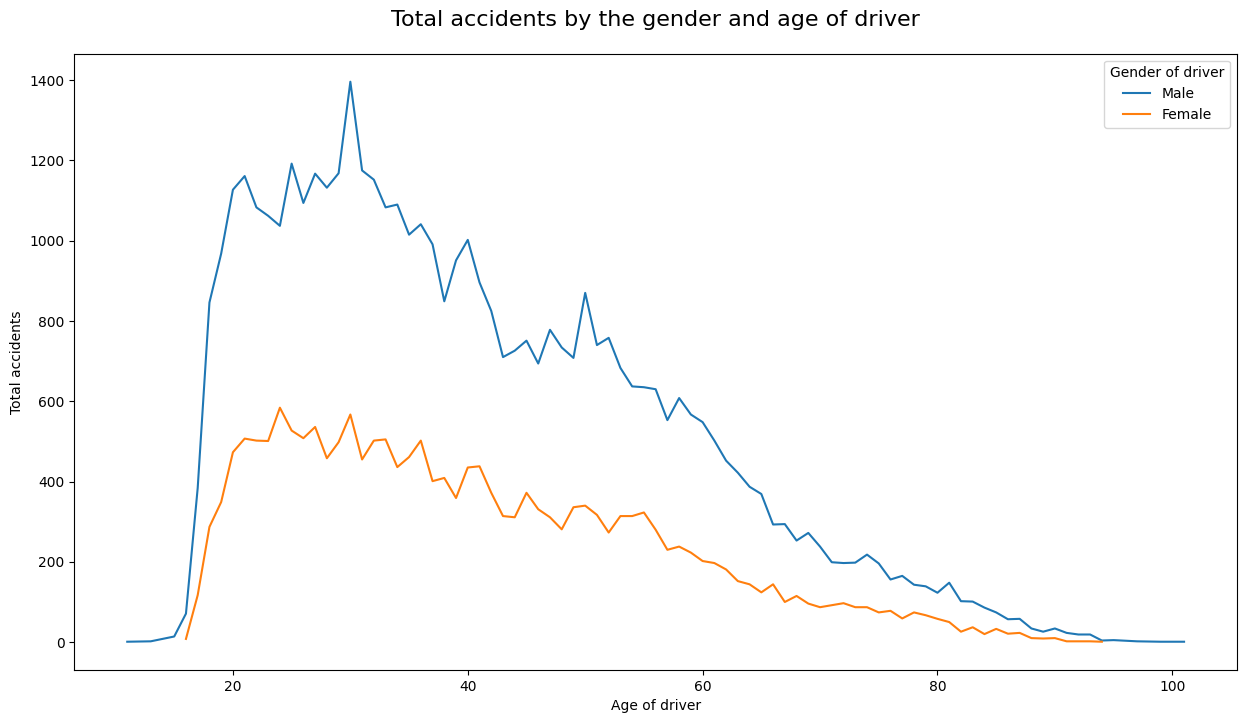

In [19]:
## plot the total accidents by gender and age of driver ##

# lines
PIVOT_TBL_1a.plot(kind="line", figsize=(15,8))

# x-axis
plt.xlabel('Age of driver')

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents by the gender and age of driver', pad=20, fontsize=16)
plt.legend(labels=["Male", "Female"], title="Gender of driver", loc="upper right")
plt.show()

#### What are the total casualties by the age and gender of the casualties?
We also tested whether male and female casualties would show different age distributions in total casualties. To do so, we made a pivot table counting the total casualties according to the age of casualties as index and sex of casualties as columns. The data is plotted with a line graph.

In [20]:
## pivot table counting the total casualties with age of casualties as index and sex of casualties as columns ##
PIVOT_TBL_1b= GEN_AGE_AF.pivot_table(
   index = 'age_of_casualty',
   columns="sex_of_casualty",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_1b

sex_of_casualty     1      2
age_of_casualty             
0                39.0   40.0
1                58.0   68.0
2                65.0   70.0
3                74.0   91.0
4                95.0  105.0
...               ...    ...
95                9.0    1.0
96                NaN    2.0
97                7.0    3.0
98                NaN    2.0
100               1.0    1.0

[100 rows x 2 columns]

Males were more likely to be involved in casualties than females, with the exception at the ages of 72 (male = 132, female = 141), 79 (male = 89, female = 113), 86 (male = 46, female = 54). The highest number of male casualties were at the age of 27 (n = 1152.0) and females at 22 years old (n = 715.0). 

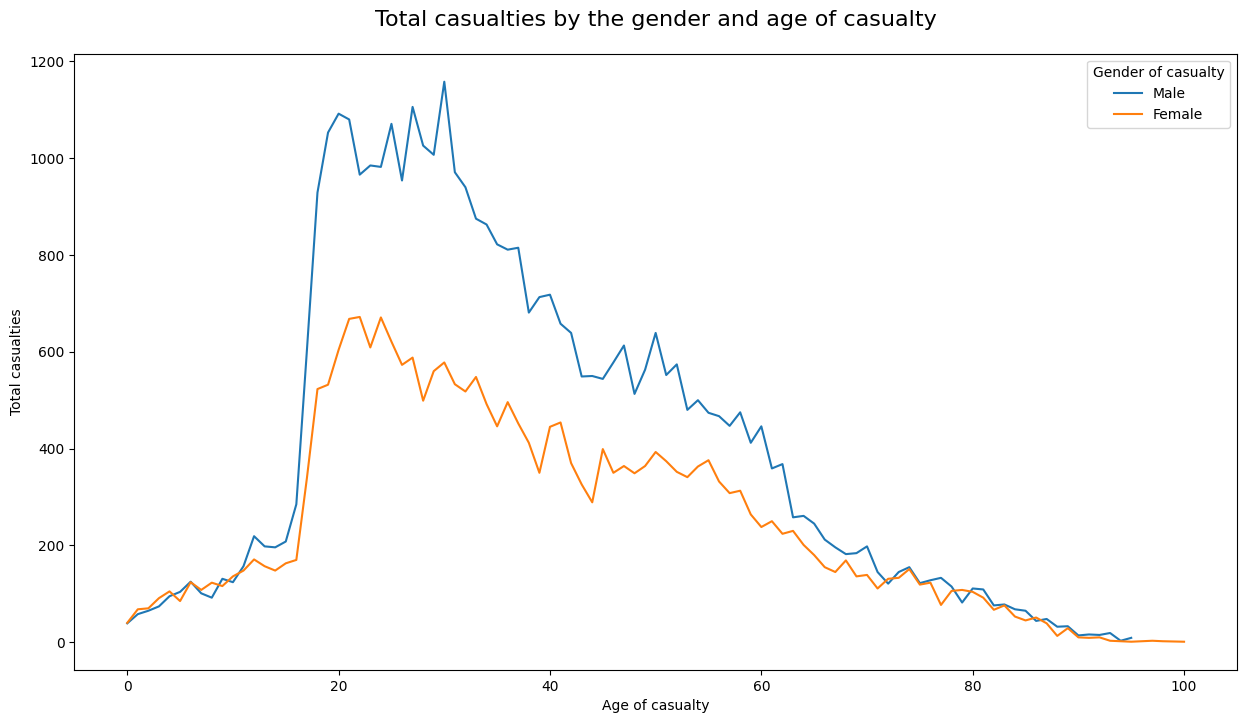

In [21]:
## plot the total casualties by gender and age of casualties ##
# lines
PIVOT_TBL_1b.plot(kind="line", figsize=(15,8))

# x-axis
plt.xlabel('Age of casualty')

# y-axis
plt.ylabel('Total casualties')

# other elements of the plot
plt.title('Total casualties by the gender and age of casualty', pad=20, fontsize=16)
plt.legend(labels=["Male", "Female"], title="Gender of casualty", loc="upper right")
plt.show()

#### What are the total accidents by casualty severity and the gender of driver?
We are also interested in whether the driver gender accident distribution would differ according to casualty severity. Similar to the above findings, the bar graph shows that more male drivers are involved in accidents, including those that caused slight, serious and fatal casualties.

In [22]:
## pivot table counting the total accidents with casualty severity as index and sex of drivers as columns ##
PIVOT_TBL_1c = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="sex_of_driver",
   aggfunc = "count")['age_of_driver']

PIVOT_TBL_1c

sex_of_driver          1      2
casualty_severity              
1                    703    164
2                   7620   2479
3                  37001  16726

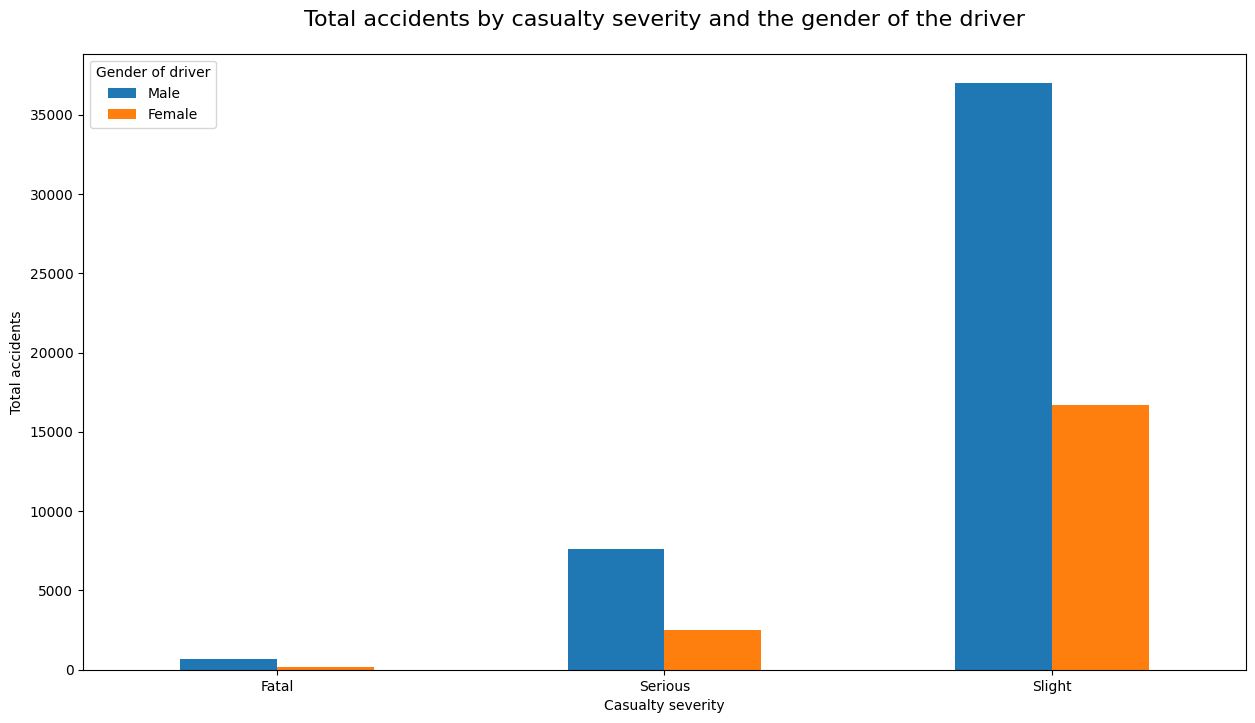

In [23]:
## plot the total accidents by casualty severity and gender of drivers ##
# bars
PIVOT_TBL_1c.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by casualty severity and the gender of the driver',  pad=20, fontsize=16)
plt.legend(title="Gender of driver", labels=["Male", "Female"], loc="upper left")
plt.show()

#### What are the total accidents by casualty severity and the age of driver?
We also looked at the drivers' age distribution based on the casualty severity and it looks like those in their mid 20s to 30s (26-35 age group) are more likely to be involved in a fatal car accident

In [24]:
## pivot table counting the total accidents with casualty severity as index and age band of drivers as columns ##
PIVOT_TBL_1d = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="age_band_of_driver",
   aggfunc = "count") ["sex_of_driver"]

PIVOT_TBL_1d

age_band_of_driver    3       4       5        6        7       8       9   \
casualty_severity                                                            
1                    NaN    64.0    97.0    200.0    136.0   150.0   122.0   
2                   12.0   805.0  1304.0   2357.0   1849.0  1556.0  1191.0   
3                   16.0  3761.0  6755.0  13841.0  10670.0  8671.0  5696.0   

age_band_of_driver      10      11  
casualty_severity                   
1                     56.0    42.0  
2                    588.0   437.0  
3                   2693.0  1624.0

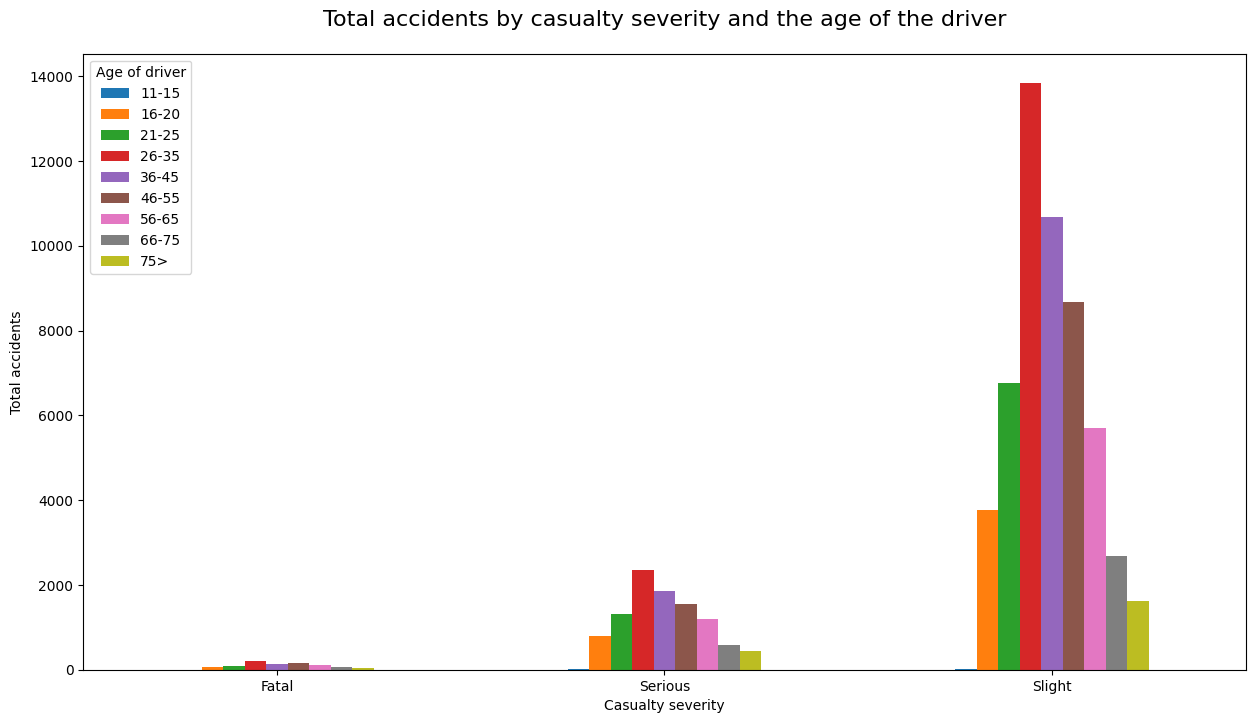

In [25]:
## plot the total accidents by casualty severity and age of drivers ##
# bars
PIVOT_TBL_1d.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by casualty severity and the age of the driver', pad=20, fontsize=16)
plt.legend(title="Age of driver", labels=age_band_driver, loc="upper left")
plt.show()

#### What are the total casualties by casualty severity and the gender of casualty?

Other than drivers, we also explored the gender distribution of casualties according to casualty severity with a bar chart. Similar to the driver gender distribution, there are more male casualties across all casualty severity levels but this gender difference is less drastic than that of the drivers.

In [26]:
## pivot table counting the total casualties with  casualty severity as index and sex of casualty as columns ##
PIVOT_TBL_1e = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="sex_of_casualty",
   aggfunc = "count")['age_of_casualty']

PIVOT_TBL_1e

sex_of_casualty        1      2
casualty_severity              
1                    665    202
2                   6982   3117
3                  31875  21852

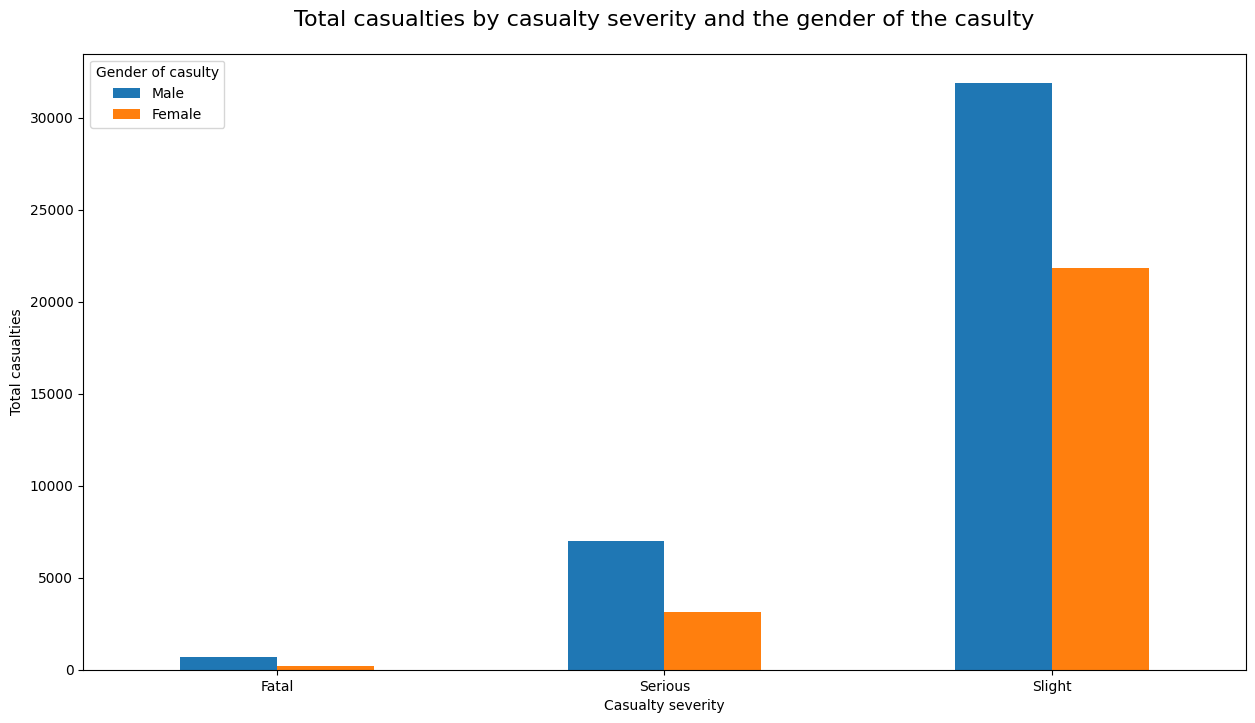

In [27]:
## plot the total casualties by casualty severity and sex of drivers ##
# bars
PIVOT_TBL_1e.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total casualties')

# other elements
plt.title('Total casualties by casualty severity and the gender of the casulty',  pad=20, fontsize=16)
plt.legend(title="Gender of casulty", labels=["Male", "Female"], loc="upper left")
plt.show()

#### What are the total casualties by casualty severity and the age of casualty?

We examined the age difference of casualties according to casualty severity. Across all casualty severity levels, most casualties are aged 36-45 which differed from that of the accident distributions by driver age.

In [28]:
## pivot table counting the total casualties with casualty severity as index and age band of casualty as columns ##
PIVOT_TBL_1f = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="age_band_of_casualty",
   aggfunc = "count") ["sex_of_casualty"]

PIVOT_TBL_1f

age_band_of_casualty   1     2     3     4     5      6     7     8     9   \
casualty_severity                                                            
1                       6     6     2    83    90    171   106   117   106   
2                     109   126   301  1084  1258   2081  1452  1387  1149   
3                     779  1048  1462  4963  6977  12805  9113  7608  5023   

age_band_of_casualty    10    11  
casualty_severity                 
1                       77   103  
2                      580   572  
3                     2392  1557

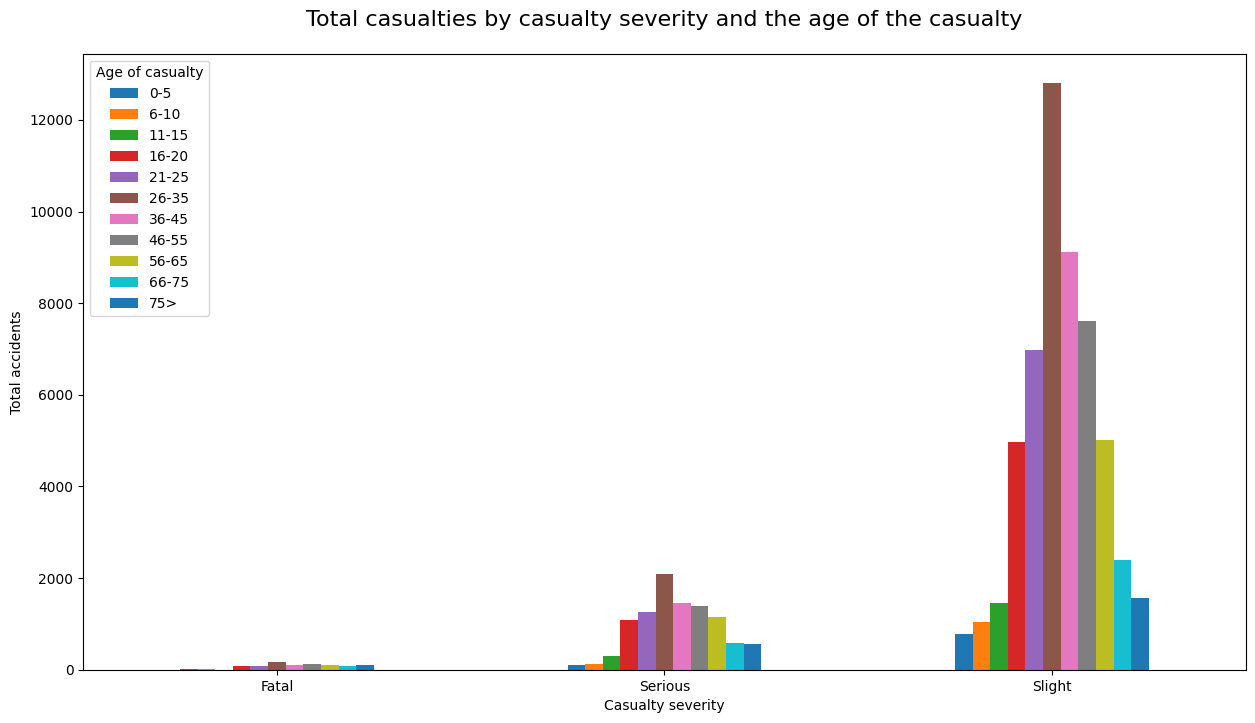

In [29]:
## plot the total casualties by casualty severity and sex of drivers ##
# bars
PIVOT_TBL_1f.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total casualties by casualty severity and the age of the casualty',  pad=20, fontsize=16)
plt.legend(title="Age of casualty", labels=age_band_casualty, loc="upper left")

### QUESTION 2: What times are more likely to have a higher number of traffic accidents?

We started by looking widely at the months of the year to see which one of them have a higher likelihood of a traffic accident to happen. We looked at the column 'date' and turned it into months so it is easier to see the overall for each month.

#### What is the total number of accidents for each month?

In [30]:
## count of accidents per month ##
DF['month'] = pd.DatetimeIndex(DF['date']).month
month_count = DF.month.value_counts().sort_index()
month_count

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_3171/3563037369.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


1     4395
2     4280
3     4767
4     6132
5     6366
6     5884
7     6106
8     6319
9     6148
10    5031
11    4800
12    4465
Name: month, dtype: int64

We then plotted our findings in a line graph; we were a little surprised, because we expected traffic accidents to happen more often in the months that have more rain and wind. From this line graph, we can see that a majority of accidents happen during spring and summer. We theorise that this is because people go out more often due to the nicer weather conditions.

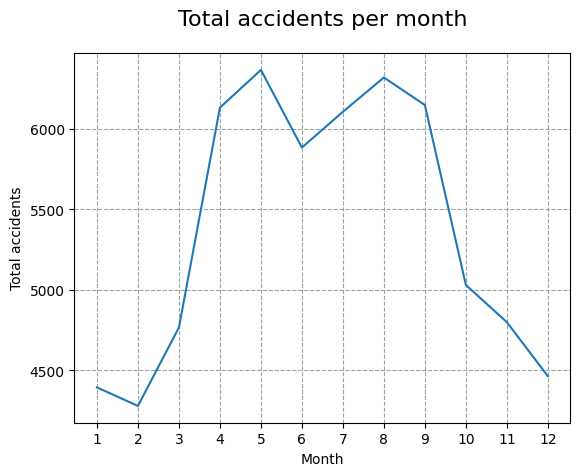

In [31]:
## plotting the accidents per month ##

# line
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], month_count)

# x-axis
plt.xlabel('Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per month',  pad=20, fontsize=16)
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

#### What is the total number of accidents by the week day?

Then, we looked into the days. We did a value count of them to be able to plot it into a line graph.

In [32]:
## count of accidents per day of week ##
day_of_week_count = DF.day_of_week.value_counts().sort_index()
day_of_week_count

1     7833
2     8784
3     8730
4     9272
5     9557
6    11057
7     9460
Name: day_of_week, dtype: int64

This line graph shows the overall increase from day-to-day of traffic accidents and Friday has the higher likelihood of a traffic accident happening. A lot more people travel during Fridays for dinner, grocery shopping, arriving home from work etc.. We speculate that is in relation with the tiredness accumulated during the week from work.

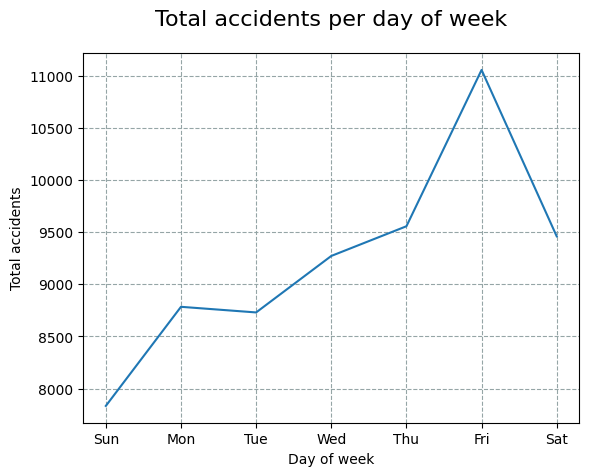

In [33]:
## plotting the accidents per month ##

# line
plt.plot(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], day_of_week_count)

# x-axis
plt.xlabel('Day of week')
plt.xticks(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per day of week',  pad=20, fontsize=16)
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

After our break-down of the days, we wanted to look even deeper to see what the data could tell us. We created a pivot table to see each day individually and how traffic accidents happened by the hour.

#### What is the total number of accidents per each hour?

In [34]:
## count the number of accidents by hour ##
times = pd.to_datetime(DF.time)
hours = DF.groupby([times.dt.hour]).time.count()
hours

time
0      961
1      660
2      404
3      352
4      390
5      735
6     1232
7     2423
8     3225
9     2564
10    2855
11    3570
12    4137
13    4128
14    4183
15    4918
16    5782
17    5903
18    4399
19    3343
20    2584
21    2489
22    2043
23    1413
Name: time, dtype: int64

Text(0.5, 1.0, 'Total accidents at every hour')

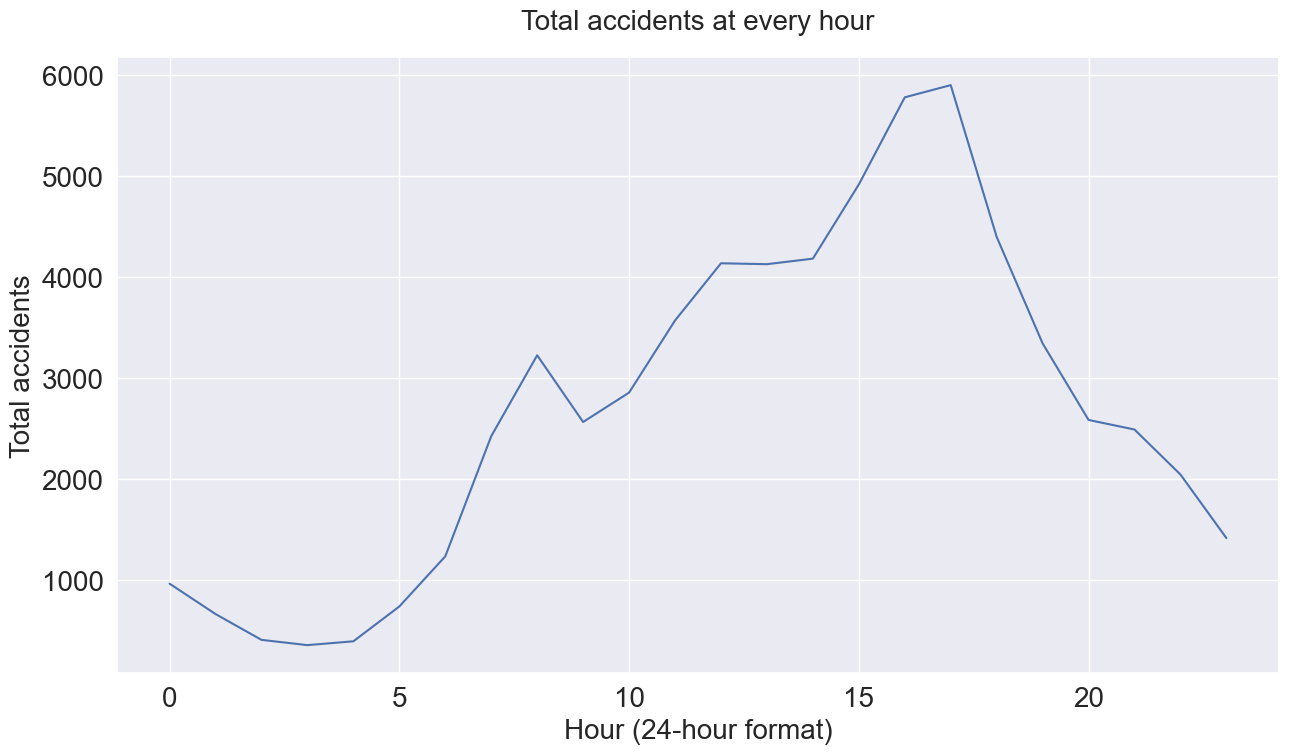

In [35]:
## plot the total accidents by hour ##

# figure size
sns.set(rc={'figure.figsize':(15, 8)})

# line
sns.lineplot(x=range(0,24), y=hours)

# x-axis
plt.xlabel('Hour (24-hour format)', fontsize=20)
plt.xticks(fontsize=20)

# y-axis
plt.ylabel('Total accidents', fontsize=20)
plt.yticks(fontsize=20)

# other elements
plt.title('Total accidents at every hour', pad=20, fontsize=20)

#### What is the total of traffic accidents per week day depending on the hour?

To analyse our dataset deeper, we decided to look into comparing the week day against the hour. The result is similar to that of an 8 to 4 or 9 to 5 working pattern, which we found interesting.

In [36]:
## convert dates and times to months and hours respectively ##

# convert all dates to months in DF
DF['month'] = pd.DatetimeIndex(DF['date']).month

# convert all times to hours in DF
DF['hour'] = pd.DatetimeIndex(DF['time']).hour

# preview the new columns
DF[['month','hour']]

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_3171/2152554901.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


month  hour
0          1     3
1          1     3
2          1     3
3          1     3
4          1     3
...      ...   ...
64688      5     8
64689      5     8
64690      5     8
64691     12    18
64692     12    18

[64693 rows x 2 columns]

We created a new variable to contain only the columns that we will be using for the pivot table.

In [37]:
## pivot table of week day and hour count ##

# make a new dataframe for variables required for the pivot table
DAY_HOUR_MONTH_DF = DF[['day_of_week','casualty_severity', 'hour', 'month']]

# make a list of days
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# pivot table with hour as index and day of week as columns
PIVOT_TBL_2a = DAY_HOUR_MONTH_DF.pivot_table(
   index = 'hour',
   columns="day_of_week",
   aggfunc = "count")['casualty_severity']

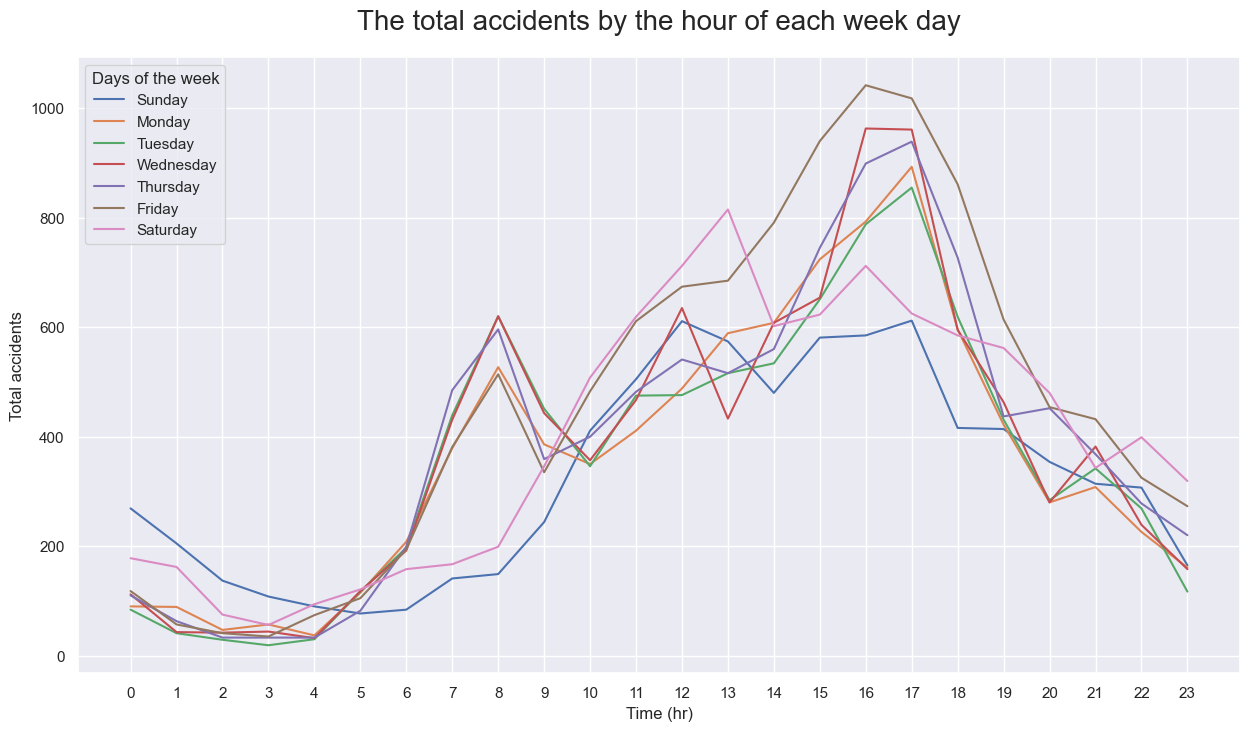

In [38]:
## plot the total accidents by hour of each day of week ##

# lines
PIVOT_TBL_2a.plot(kind="line", figsize=(15,8))

# x-axis
plt.xlabel('Time (hr)')
plt.xticks(range(0, 24))

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('The total accidents by the hour of each week day', pad=20, fontsize=20)

plt.legend(labels=days, title="Days of the week", loc="upper left")

Furthermore, we compared the day against the month to see how each week day increases or decreases in the number of traffic accidents throughout the year.

In [39]:
## pivot table with month as index and day of week as columns ##
PIVOT_TBL_2b = DAY_HOUR_MONTH_DF.pivot_table(
   index = 'month',
   columns="day_of_week",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_2b

day_of_week    1     2     3     4     5     6     7
month                                               
1            442   586   486   687   887   755   552
2            537   546   626   462   594   839   676
3            519   655   704   892   550   747   700
4            728   676   712   877  1159  1126   854
5            947  1021   652   562   893  1288  1003
6            761   917  1010   951   611   757   877
7            725   593  1042  1004   918   891   933
8            779   982   808  1040   809  1038   863
9            544   856   973   870  1094  1013   798
10           580   502   469   922   591  1056   911
11           775   585   661   406   860   631   882
12           496   865   587   599   591   916   411

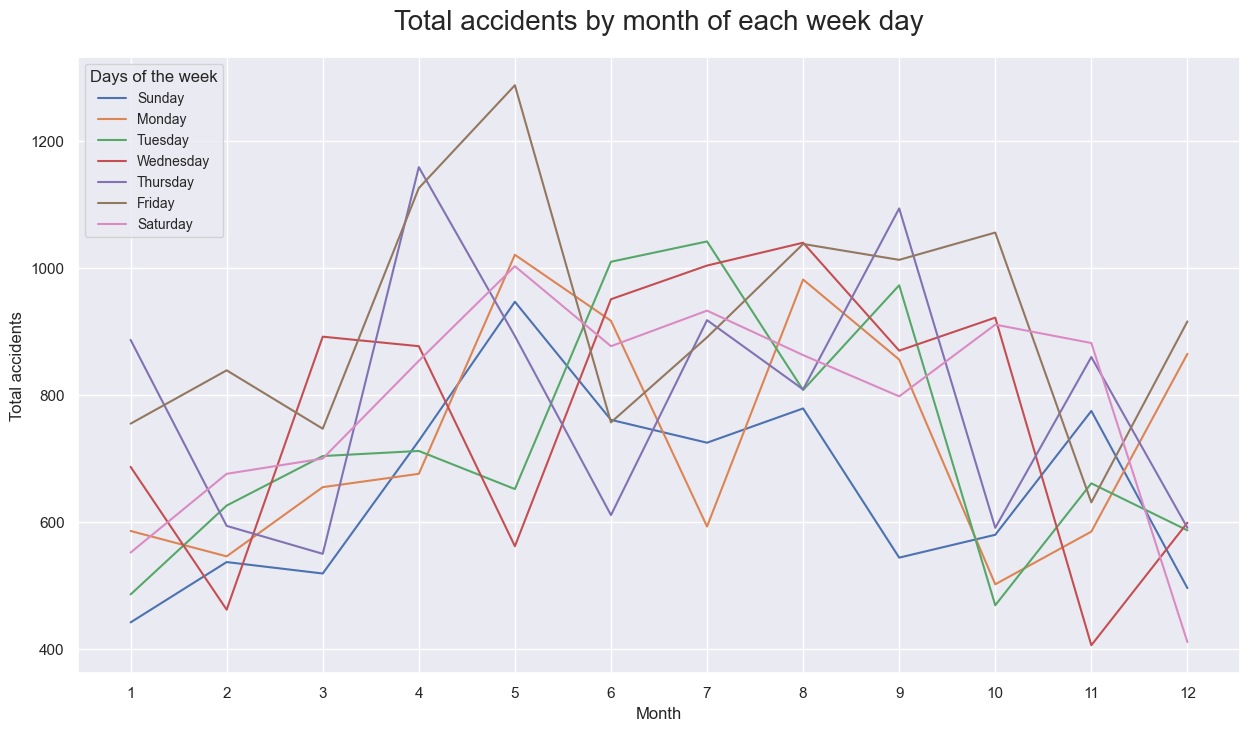

In [40]:
## plot total accidents by month of each day of week ##
# lines
PIVOT_TBL_2b.plot(kind="line", figsize=(15,8))

# x-axis
plt.xlabel('Month')
plt.xticks(range(1, 13))

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents by month of each week day', pad=20, fontsize=20)

plt.legend(labels=days, title="Days of the week", loc="upper left", fontsize=10)

We then looked at the weather conditions and compared them to the hour of the day, based on the accident severity. It looks like the majority of accidents, fatal, serious and slight, happen during fine weather with no high winds. 

In [41]:
## count the number of accidents by accident severity and weather conditions ##

# make a new data frame with variables required
WTHR_LIGHT = DF[['hour','accident_severity', 'weather_conditions', 'light_conditions']]

# make a list of the labels for each weather condition
wthr_labels = ["Fine no high winds", "Raining no high winds", "Snowing no high winds", "Fine with high winds", "Raining with high winds", "Snowing with high winds", "Fog/Mist", "Other", "Unknown"]

# pivot table with accident severity as index and weather conditions as columns
PIVOT_TBL_2c = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns= 'weather_conditions')['hour']

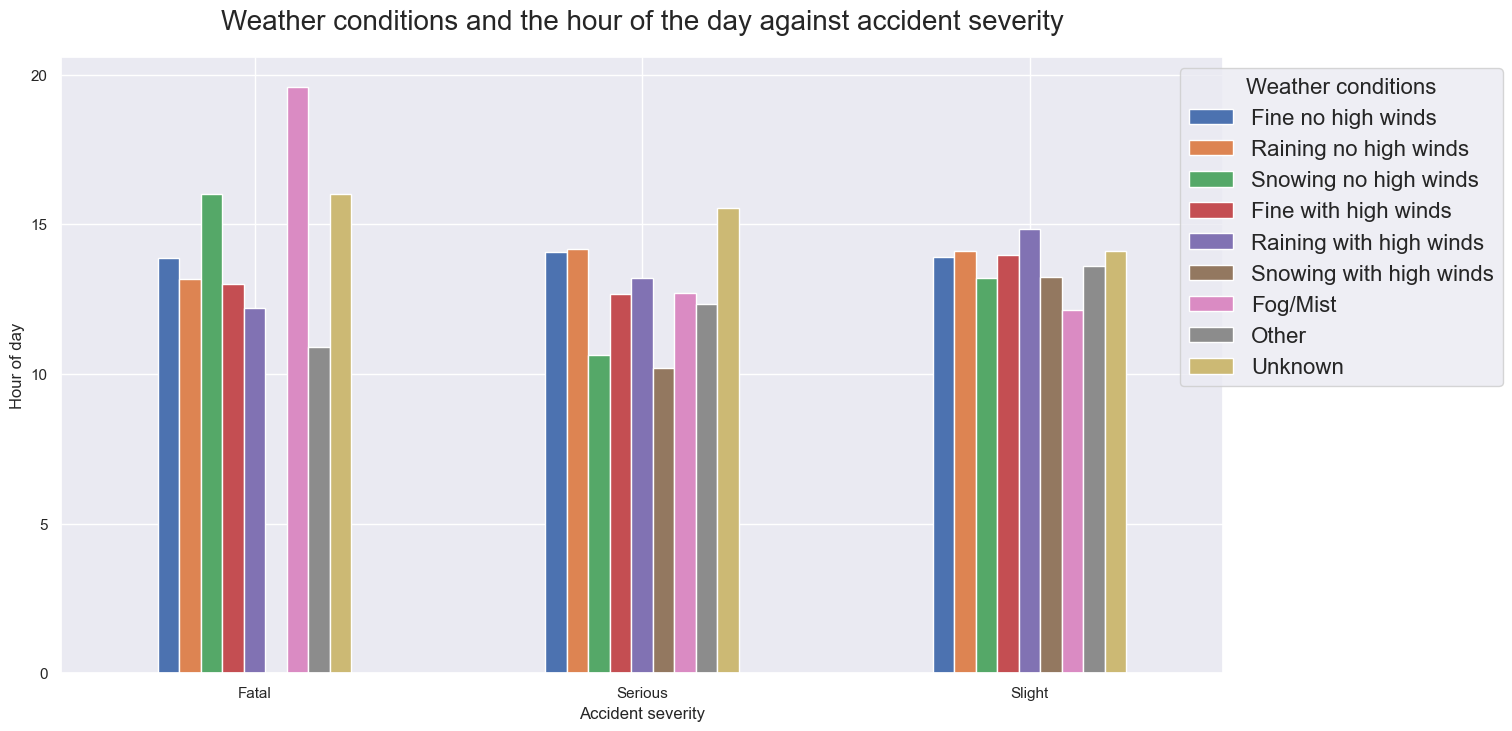

In [42]:
## plot the number of accidents by accident severity and weather conditions ##

# bar
PIVOT_TBL_2c.plot(kind="bar", figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Hour of day')
plt.yticks(range(0,24,5), rotation ='horizontal')

#other elements
plt.title('Weather conditions and the hour of the day against accident severity', pad=20, fontsize=20)
plt.legend(title="Weather conditions", title_fontsize='16', labels = wthr_labels, fontsize='16', loc="upper right", bbox_to_anchor=(1.25, 1))

We also looked at the weather conditions and the total of traffic accidents, based on the accident severity. It looks like the majority of accidents, fatal, serious and slight, happen during fine weather with no high winds again.

In [43]:
## pivot table with accident severity as index and weather conditions as columns ##
PIVOT_TBL_2e = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns="weather_conditions",
   aggfunc="count")['hour']

PIVOT_TBL_2e

weather_conditions        1       2      3      4      5      6      7  \
accident_severity                                                        
1                    1186.0   151.0    2.0   20.0   26.0    NaN   15.0   
2                   11255.0  1436.0  100.0  145.0  190.0   22.0   93.0   
3                   40509.0  5152.0  349.0  391.0  484.0  107.0  203.0   

weather_conditions       8       9  
accident_severity                   
1                     18.0    10.0  
2                    291.0    99.0  
3                   1362.0  1077.0

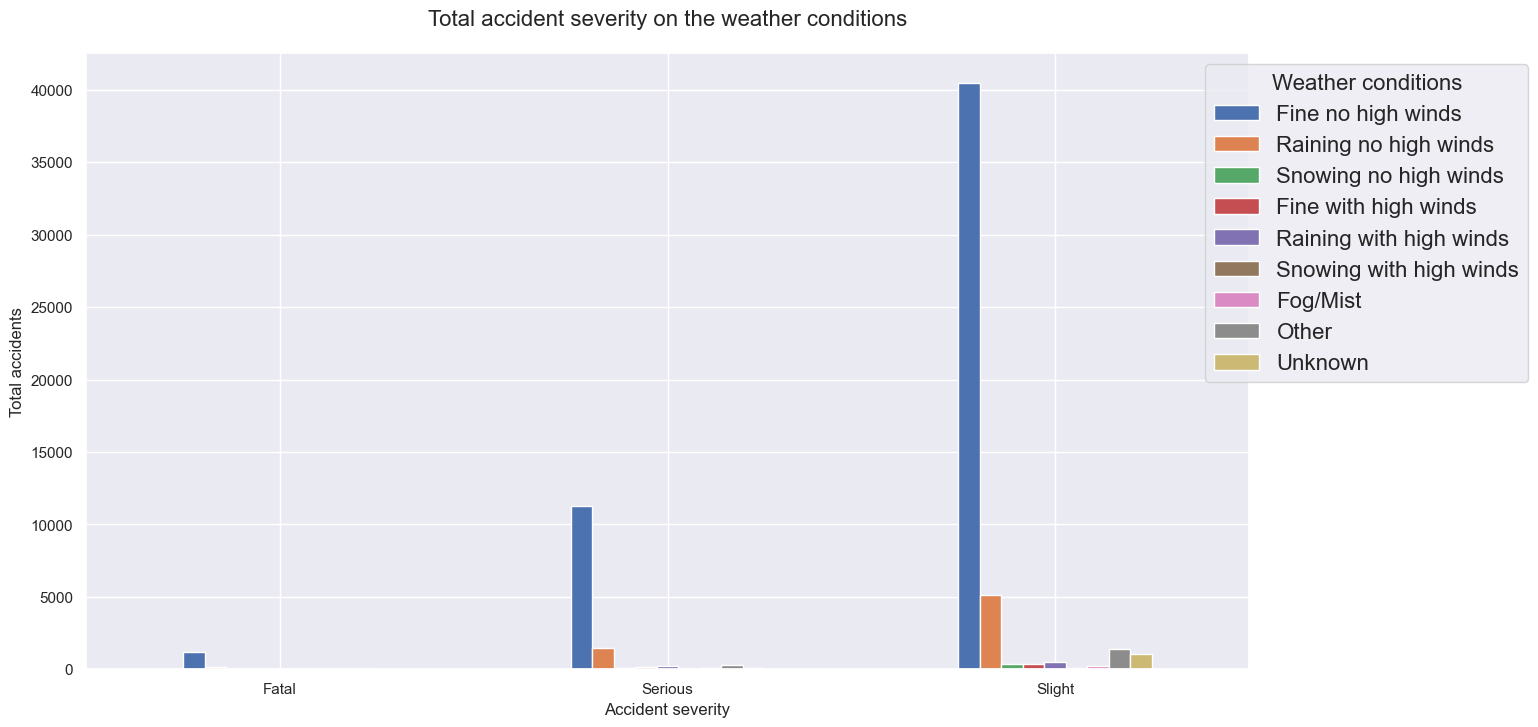

In [44]:
## plot the total accidents by accident severity and light conditions ##

# bar chart
PIVOT_TBL_2e.plot(kind="bar",figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Total accidents')

#other elements
plt.title('Total accident severity on the weather conditions', pad = 20, fontsize = 16)
plt.legend(title="Weather conditions", title_fontsize='16', labels = wthr_labels, fontsize='16', loc="upper right", bbox_to_anchor=(1.25, 1))

#### What is the total number of traffic accidents based on the light conditions?

Whilst looking at the time of each traffic accident taking place, we thought that light conditions may be an important factor contributing to a traffic accident taking place.

In [45]:
## pivot table to calculate the total accidents by light conditions and accident severity ##
PIVOT_TBL_2d = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns="light_conditions",
   aggfunc="count")['hour']

PIVOT_TBL_2d

light_conditions       1     4    5     6    7
accident_severity                             
1                    851   288   19   236   34
2                   9236  2852  141  1305   97
3                  37116  9349  321  2210  638

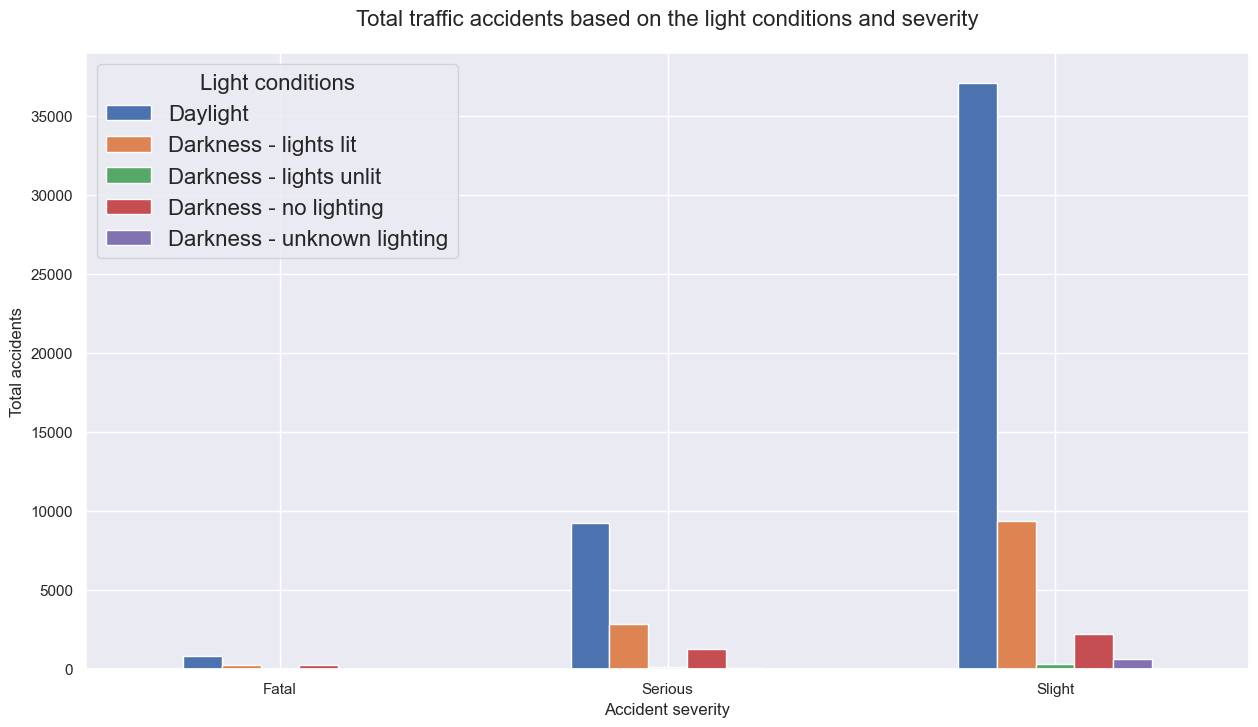

In [46]:
## plot the total accidents by light conditions and accident severity ##

# bar chart
PIVOT_TBL_2d.plot(kind="bar",figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Total accidents')

#other elements
plt.title('Total traffic accidents based on the light conditions and severity', pad=20, fontsize=16)
light_labels = ["Daylight", "Darkness - lights lit", "Darkness - lights unlit", "Darkness - no lighting", "Darkness - unknown lighting"]
plt.legend(title="Light conditions", title_fontsize='16', labels=(light_labels), fontsize='16', loc="upper left")

### QUESTION 3: What areas in the UK are more likely to have traffic accidents?

Lastly, we decided to look at the location of the traffic accidents to see whether a higher population, like the one in the bigger cities, would be the cause of traffic accidents.

In [47]:
## count the total accidents by accident severity and junction location ##

# new data frame with variables requried
JUNC_COUNTY_ROAD = DF[['junction_location','local_authority_ons_district','road_type','accident_severity']]

# pivot table with accident severity as index and junction location as columns
PIVOT_TBL_5 = JUNC_COUNTY_ROAD.pivot_table(
   index = 'accident_severity',
   columns="junction_location",
   aggfunc = "count")['local_authority_ons_district']

PIVOT_TBL_5

junction_location        0        1       2      3       4       5       6  \
accident_severity                                                            
1                    981.0    176.0    40.0    6.0     9.0    25.0    32.0   
2                   6397.0   2613.0   691.0  192.0   343.0   396.0   661.0   
3                  19347.0  11305.0  2476.0  934.0  1732.0  1351.0  2207.0   

junction_location      7       8       9  
accident_severity                         
1                    NaN   159.0     NaN  
2                   52.0  2223.0    63.0  
3                  211.0  7898.0  2173.0

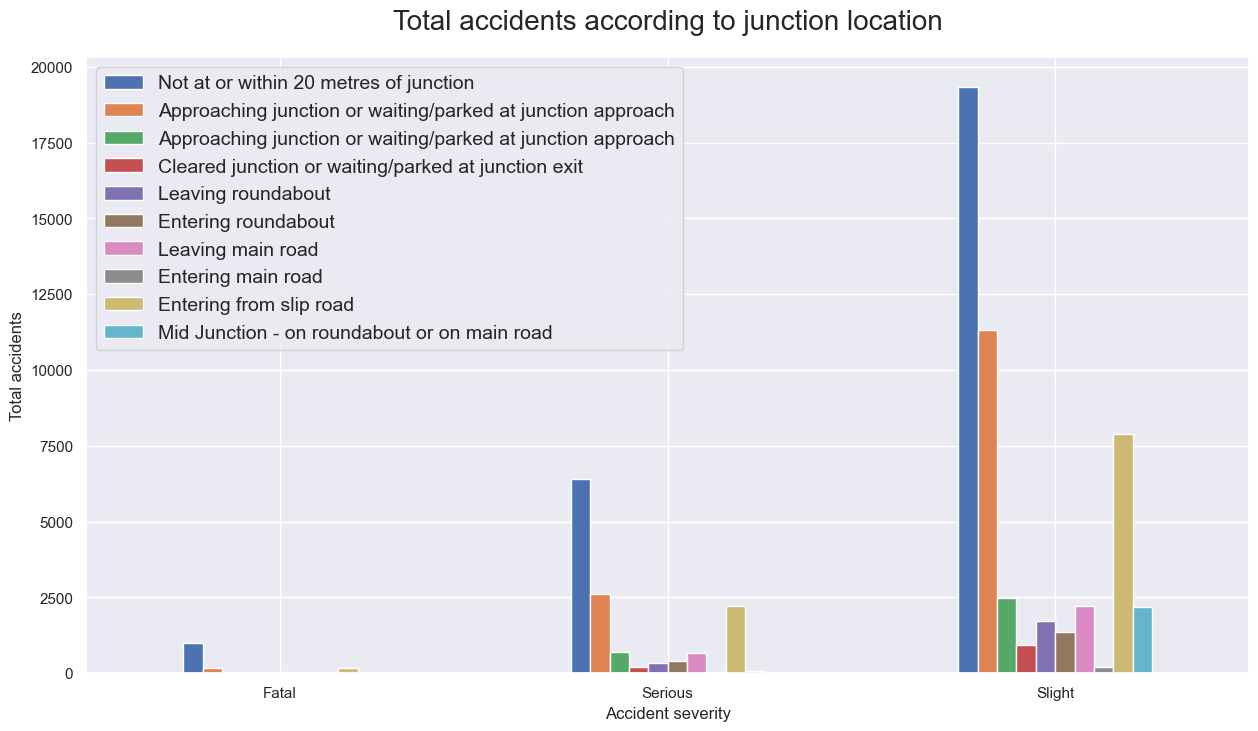

In [48]:
## plot the total accidents by accident severity and junction location ##
# Bar
PIVOT_TBL_5.plot(kind="bar", figsize=(15,8))

# x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents according to junction location', pad=20, fontsize=20)
junction_labels = ["Not at or within 20 metres of junction", "Approaching junction or waiting/parked at junction approach", "Approaching junction or waiting/parked at junction approach", "Cleared junction or waiting/parked at junction exit", "Leaving roundabout", "Entering roundabout", "Leaving main road", "Entering main road", "Entering from slip road", "Mid Junction - on roundabout or on main road", "Self reported"]
plt.legend(labels=junction_labels, loc="upper left", fontsize=14)

We also wanted to make use of the latitude and longitude columns by mapping them on the UK map. For this we used folium and geopy.

One of the limitations of using Nominatim's API is the fact that it is unable to handle our large dataset; it can only handle 1,000 values and our dataset (after making the accident index unique) is about 14,000 rows. Therefore, we were only able to plot the fatal accidents.

To start, we will use a new variable MAP_DF to bring together the columns that we are interested in. This is because we want to make sure the API will not crash from an overload of columns.

In [49]:
MAP_DF = DF[['latitude', 'longitude', 'accident_severity', 'accident_index']]

In [50]:
MAP_DF

latitude  longitude  accident_severity accident_index
0      51.509767  -0.050574                  2  2021010287149
1      51.509767  -0.050574                  2  2021010287149
2      51.509767  -0.050574                  2  2021010287149
3      51.509767  -0.050574                  2  2021010287149
4      51.509767  -0.050574                  2  2021010287149
...          ...        ...                ...            ...
64688  52.697776  -3.172778                  1  202163DF01721
64689  52.697776  -3.172778                  1  202163DF01721
64690  52.697776  -3.172778                  1  202163DF01721
64691  52.662169  -3.364790                  1  202163DF02122
64692  52.662169  -3.364790                  1  202163DF02122

[64693 rows x 4 columns]

Now we will reduce the dataset in order to be able to analyse it. Do note that although the accident index is typically not unique, that is because it accounts for one accident and each casualty it may have. So an accident may have 8 casualties, which results in 8 entries for the accident index. For this analysis, we want the index to be unique because we are only looking at the location.

In [51]:
MAP_DF = MAP_DF.drop_duplicates(['accident_index'], keep = False)

We will also look at the 'fatality' values only. This is because the Nominatim API is unable to handle more than 1,000 rows. The fatality is < 1,000!

In [52]:
dv = [2, 3]
MAP_DF = MAP_DF[MAP_DF.accident_severity.isin(dv) ==  False]

Now we will import the libraries we will need for this analysis.

In [53]:
geolocator = Nominatim(user_agent="geoapiExercises")

We will also slow down the API recall for Nominatim, because it may crash otherwise.

In [54]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1,   return_value_on_exception = None) 

We decided to test the API because we were running into trouble trying to return the city of the latitude and longitude. Running this test code will return the output 'London'! It is also the proof of the city name based on the longitude and latitude.

In [55]:
test_geolocator = Nominatim(user_agent="https://nominatim.openstreetmap.org/search?q=<postalcodes>")

test_coordinates = "51.5211707", "-0.00835247"

test_location = test_geolocator.reverse(test_coordinates)

test_address = test_location.raw['address']

# Traverse the data
test_city = test_address.get('city', '')
test_state = test_address.get('state', '')
test_country = test_address.get('country', '')

test_city

'London'

We will create a function that we can apply to our selected dataset NEW_DF.

In [56]:
def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(Point(coord), exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

..and then we'll apply the function! Now we have the cities of all fatal accidents and we can plot it to see the areas with the highest concentration.

In [57]:
MAP_DF = MAP_DF.apply(city_state_country, axis=1)

We also used Folium to mark the fatal accidents from above on the map.

In [58]:
UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 
UK

In [59]:
for i in range(0,len(MAP_DF)):
   folium.Marker(
      location=[MAP_DF.iloc[i]['latitude'], MAP_DF.iloc[i]['longitude']],
      popup= MAP_DF.iloc[i]['city'],
   ).add_to(UK)

In [60]:
UK

We also imported folium's plugin 'HeatMap' to see the concentration of accident severity: we divided these by serious, slight and fatal.

The Nominatin API is able to handle the dataset using a heatmap much better than trying to use a marker. Therefore, we used the normal dataset for this visualisation. We separated them into the three accident severity values: fatal, severe, slight. We also used different maps in new variables in order to distinguish between them. Otherwise Folium would try to plot the heatmaps into one single map, skewing our visualisation.

1. FATAL

In [61]:
# Getting rid of the other values, slight and serious, to only keep the fatal accidents.
dv1 = [3, 2]
FATAL = DF[DF.accident_severity.isin(dv1) ==  False]

In [62]:
# Creating a new map variable for the fatalities.
FATAL_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [63]:
# Using the lambda function to combine the latitude and longitude into one column.
fatal_latlon = FATAL.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [64]:
#Plotting the latitude and longitude on the map.
HeatMap(fatal_latlon).add_to(FATAL_UK)

In [65]:
# Calling the map to see the visualisation.
FATAL_UK

2. SERIOUS

In [66]:
# Getting rid of the other values, slight and fatal, to only keep the fatal accidents.
dv2 = [3, 1]
SERIOUS = DF[DF.accident_severity.isin(dv2) ==  False]

In [67]:
# Creating a new map variable for the serious accidents.
SERIOUS_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [68]:
# Using the lambda function to combine the latitude and longitude into one column.
serious_latlon = SERIOUS.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [69]:
#Plotting the latitude and longitude on the map.
HeatMap(serious_latlon).add_to(SERIOUS_UK)

In [70]:
# Calling the map to see the visualisation.
SERIOUS_UK

3. SLIGHT

In [71]:
# Getting rid of the other values, fatal and serious, to only keep the fatal accidents.
dv3 = [1, 2]
SLIGHT = DF[DF.accident_severity.isin(dv3) ==  False]

In [72]:
# Creating a new map variable for the serious accidents.
SLIGHT_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [73]:
# Using the lambda function to combine the latitude and longitude into one column.
slight_latlon = SLIGHT.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [74]:
#Plotting the latitude and longitude on the map.
HeatMap(slight_latlon).add_to(SLIGHT_UK)

In [75]:
# Calling the map to see the visualisation.
SLIGHT_UK

#### What is the distribution of traffic accidents by the location?

This scatter plot shows the UK map with the distribution of traffic accidents; the darker the area becomes, the higher the volume of traffic accidents it represents.

Text(0.5, 1.0, 'Areas that has the most number of accidents based on latitude and longitude')

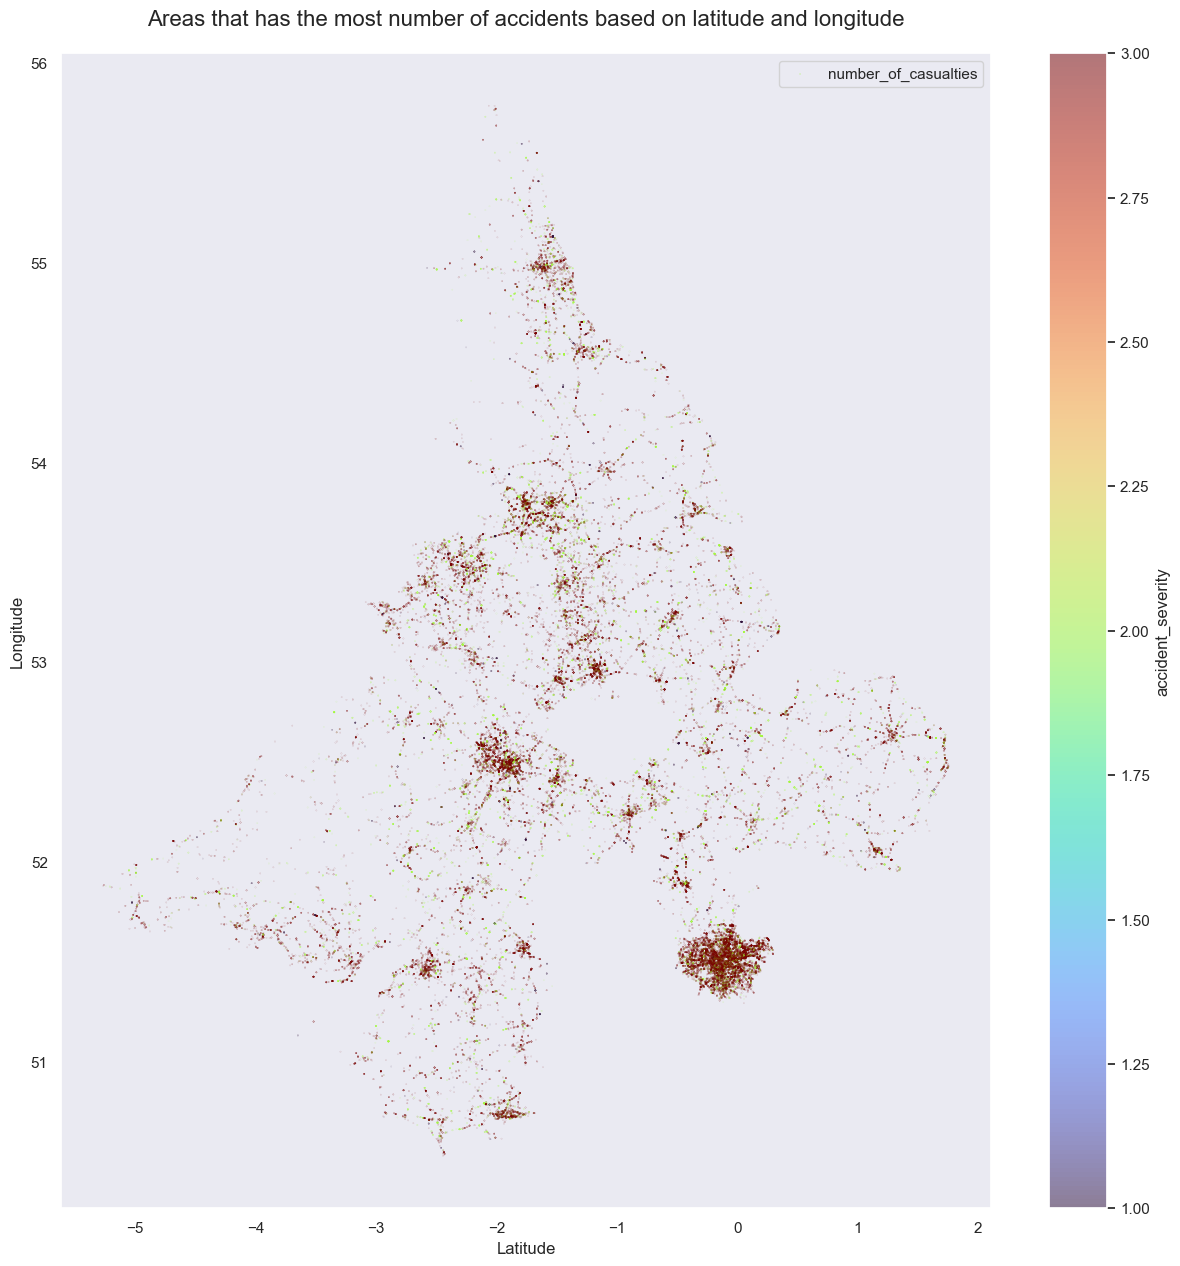

In [76]:
DF.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.5,
             s = DF["number_of_casualties"]/100, label = "number_of_casualties", figsize=(15,15),
             c = "accident_severity", cmap ='turbo', colorbar= True)
plt.legend()
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Areas that has the most number of accidents based on latitude and longitude', pad=20, fontsize=16)

#### What is the specific location that has the most traffic accidents?

The below graps shows the cluster of traffic accidents in the UK based on the latitude and longitude. The areas with most number of acidents centers around longitude -1 and +1, but what this visualisation does not show is the actual city name which is important in our findings. Using the test code to show that the API works, we can also discover the city name based on the latitude and longitude.

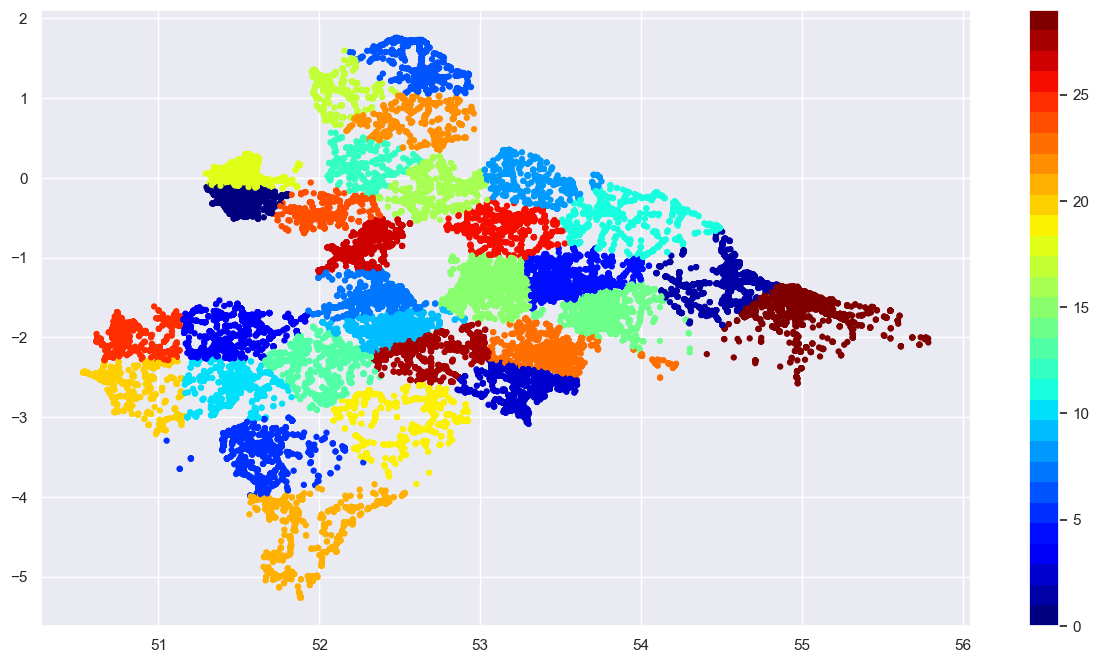

[18]
[5.15244776e+01 1.97760683e-03]
[8149 1527 1770 1725 2554 1428 1250 1534  982 3884 1668 1502  840 1480
 3662 3557 1365  807 8897  748  788  837  816 2429 1329 1629 1406 1625
 1998 2507] 18


In [77]:
x=DF.loc[:, ['latitude', 'longitude']]
kmeans = KMeans(n_clusters=30)
kmeans = kmeans.fit(x)
labels = kmeans.labels_
DF['cluster'] = labels
plt.scatter(x['latitude'], x['longitude'], s=50, c=labels, marker='.',\
            cmap=plt.cm.get_cmap('jet', 30))
plt.colorbar()
plt.show()

#plt.title('Determining Location that has the most Number of Accidents')
centers = kmeans.cluster_centers_
counts = np.bincount(labels)
result = np.where(counts == np.amax(counts))
result = result[0]
print(result)
most_accidents = centers[result]
f = result.item(0) # get the int of the cluster number
print(centers[f])
print(counts, f) 

#### What is the relationship between the type of junction location and the accident severity?

We also did a heatmap plot to show how junction locations impact accident severity. As shown in the figure below, while junction location 0-9 has quite a high level of impact on accident severity, there is a higher level of impact on accident severity with the addition of junction location 10 (i.e., 0-10).


In [78]:
x=DF['junction_location']
y=DF['accident_severity']

In [79]:
#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)


In [80]:
#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

In [81]:
#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

In [82]:
#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

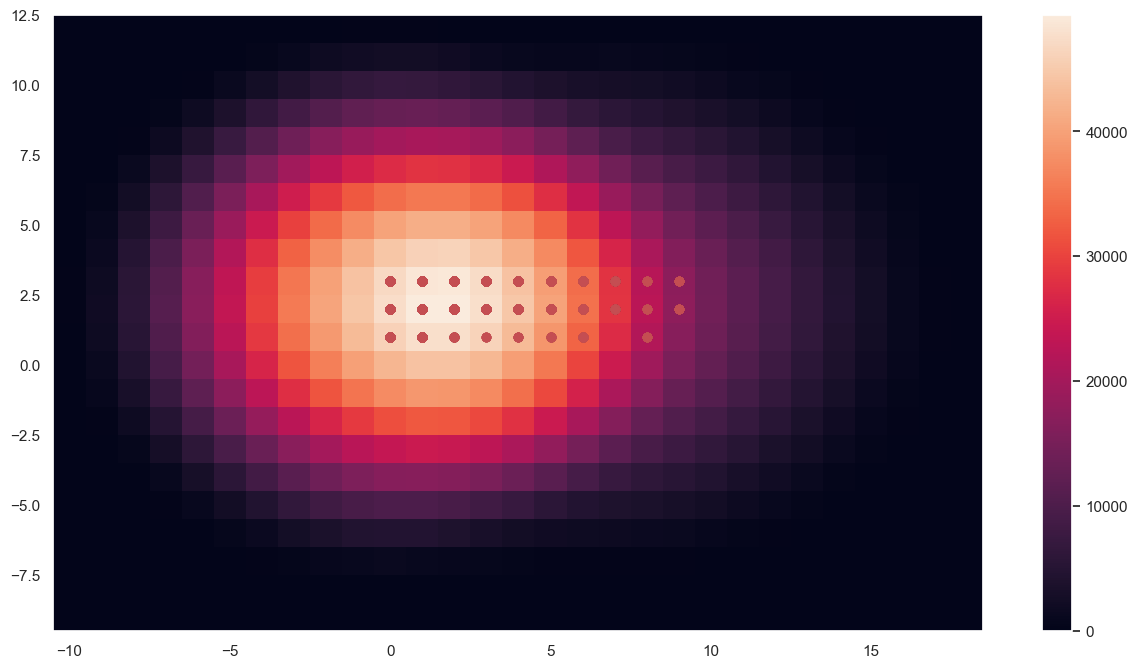

In [83]:
#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x , y ,'ro')
plt.colorbar()
plt.show()